#### Build a machine learning model that predicts which group is responsible for the terrorist attack after year 2000 based upon the information provided in that dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("globalterrorismdb_0718dist.csv")

C:\Users\rishita\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'extended':'Duration','country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','success':'Success','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
df = df[['Year','Month','Day','Country','Duration','state','Region','Success','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
df.head()

,Year,Month,Day,Country,Duration,state,Region,Success,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,0,NaN,Central America & Caribbean,1,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,0,Federal,North America,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,0,Tarlac,Southeast Asia,1,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,0,Attica,Western Europe,1,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,0,Fukouka,East Asia,1,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
df=df.drop(["Summary","Motive","longitude","latitude","city","state","Target","Killed","Wounded"],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Month        181691 non-null  int64 
 2   Day          181691 non-null  int64 
 3   Country      181691 non-null  object
 4   Duration     181691 non-null  int64 
 5   Region       181691 non-null  object
 6   Success      181691 non-null  int64 
 7   AttackType   181691 non-null  object
 8   Group        181691 non-null  object
 9   Target_type  181691 non-null  object
 10  Weapon_type  181691 non-null  object
dtypes: int64(5), object(6)
memory usage: 15.2+ MB


In [13]:
# Analysis only looks at data from 2000 onward
start_year = 2000
df = df.loc[(df['Year'] >= start_year)]
df.head()

,Year,Month,Day,Country,Duration,Region,Success,AttackType,Group,Target_type,Weapon_type
69835,2000,1,1,Namibia,0,Sub-Saharan Africa,1,Armed Assault,National Union for the Total Independence of A...,Business,Firearms
69836,2000,1,1,Namibia,1,Sub-Saharan Africa,1,Hostage Taking (Kidnapping),National Union for the Total Independence of A...,Business,Firearms
69837,2000,1,1,India,0,South Asia,1,Armed Assault,Lashkar-e-Taiba (LeT),Police,Firearms
69838,2000,1,1,Kosovo,0,Eastern Europe,1,Bombing/Explosion,Unknown,Private Citizens & Property,Explosives
69839,2000,1,1,Somalia,0,Sub-Saharan Africa,1,Armed Assault,Unknown,Private Citizens & Property,Firearms


In [14]:
# No of attacks by each Terrorist group
count=df['Group'].value_counts()

In [15]:
count.head(150)

Unknown                                        58399
Taliban                                         7474
Islamic State of Iraq and the Levant (ISIL)     5613
Al-Shabaab                                      3288
Boko Haram                                      2418
                                               ...  
Israeli settlers                                  32
Lashkar-e-Balochistan                             32
Janatantrik Terai Mukti Morcha (JTMM)             32
National Liberation Front (FNL) (Burundi)         32
Maute Group                                       31
Name: Group, Length: 150, dtype: int64

In [16]:
# we will be analyzing only top 30 groups 
num = 20
names = count.keys()[1:num+1]
names = list(names)

In [17]:

names

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Al-Shabaab',
 'Boko Haram',
 'Communist Party of India - Maoist (CPI-Maoist)',
 "New People's Army (NPA)",
 'Maoists',
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Revolutionary Armed Forces of Colombia (FARC)',
 "Kurdistan Workers' Party (PKK)",
 'Houthi extremists (Ansar Allah)',
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Al-Qaida in Iraq',
 "Donetsk People's Republic",
 'Muslim extremists',
 'Liberation Tigers of Tamil Eelam (LTTE)',
 'Fulani extremists',
 'Abu Sayyaf Group (ASG)',
 'Sinai Province of the Islamic State',
 'Palestinian Extremists']

In [18]:
# Dummies convert text data into numeric variables that a model can use 
# When we reset the index, the old index is added as a column, and a new sequential index is used and the drop parameter is used to avoid the old index being added as a column
countries = pd.get_dummies(df['Country'])
countries.reset_index(drop = True, inplace = True)

regions = pd.get_dummies(df['Region'])
regions.reset_index(drop = True, inplace = True)

attacks = pd.get_dummies(df['AttackType'])
attacks.reset_index(drop = True, inplace = True)

targets = pd.get_dummies(df['Target_type'])
targets.reset_index(drop = True, inplace = True)

weapons = pd.get_dummies(df['Weapon_type'])
weapons.reset_index(drop = True, inplace = True)

In [19]:
df.reset_index(drop=True, inplace=True)
df_dummies = pd.concat([df, countries, regions, attacks, targets, weapons], axis = 1)

In [20]:
df_dummies

,Year,Month,Day,Country,Duration,Region,Success,AttackType,Group,Target_type,...,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,1,1,Namibia,0,Sub-Saharan Africa,1,Armed Assault,National Union for the Total Independence of A...,Business,...,0,0,1,0,0,0,0,0,0,0
1,2000,1,1,Namibia,1,Sub-Saharan Africa,1,Hostage Taking (Kidnapping),National Union for the Total Independence of A...,Business,...,0,0,1,0,0,0,0,0,0,0
2,2000,1,1,India,0,South Asia,1,Armed Assault,Lashkar-e-Taiba (LeT),Police,...,0,0,1,0,0,0,0,0,0,0
3,2000,1,1,Kosovo,0,Eastern Europe,1,Bombing/Explosion,Unknown,Private Citizens & Property,...,1,0,0,0,0,0,0,0,0,0
4,2000,1,1,Somalia,0,Sub-Saharan Africa,1,Armed Assault,Unknown,Private Citizens & Property,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111850,2017,12,31,Somalia,0,Sub-Saharan Africa,1,Armed Assault,Al-Shabaab,Military,...,0,0,1,0,0,0,0,0,0,0
111851,2017,12,31,Syria,0,Middle East & North Africa,1,Bombing/Explosion,Muslim extremists,Military,...,1,0,0,0,0,0,0,0,0,0
111852,2017,12,31,Philippines,0,Southeast Asia,1,Facility/Infrastructure Attack,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,...,0,0,0,1,0,0,0,0,0,0
111853,2017,12,31,India,0,South Asia,0,Bombing/Explosion,Unknown,Government (General),...,1,0,0,0,0,0,0,0,0,0


In [21]:
df_dummies = df_dummies.drop(['Country', 'Region', 'Month', 'Day', 'AttackType','Target_type', 'Weapon_type'],
                             axis = 1)
df_dummies.head()

,Year,Duration,Success,Group,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,...,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,0,1,National Union for the Total Independence of A...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2000,1,1,National Union for the Total Independence of A...,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2000,0,1,Lashkar-e-Taiba (LeT),0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2000,0,1,Unknown,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2000,0,1,Unknown,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df_dummies = df_dummies.loc[(df_dummies['Group'] != 'Unknown') & (df_dummies['Group'].isin(names))]

In [23]:
df_dummies

,Year,Duration,Success,Group,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,...,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
31,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51,2000,0,1,Liberation Tigers of Tamil Eelam (LTTE),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
58,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
62,2000,0,0,Muslim extremists,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
80,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111843,2017,0,0,Islamic State of Iraq and the Levant (ISIL),0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
111844,2017,0,1,Al-Shabaab,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
111847,2017,0,1,Taliban,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
111850,2017,0,1,Al-Shabaab,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:

df_dummies.insert(0, "Index",np.array([x for x in range(0,34296)]), True)
df_dummies

,Index,Year,Duration,Success,Group,Afghanistan,Albania,Algeria,Angola,Argentina,...,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
31,0,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51,1,2000,0,1,Liberation Tigers of Tamil Eelam (LTTE),0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
58,2,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
62,3,2000,0,0,Muslim extremists,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
80,4,2000,0,1,Revolutionary Armed Forces of Colombia (FARC),0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111843,34291,2017,0,0,Islamic State of Iraq and the Levant (ISIL),0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
111844,34292,2017,0,1,Al-Shabaab,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
111847,34293,2017,0,1,Taliban,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
111850,34294,2017,0,1,Al-Shabaab,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:

x=df_dummies.loc[:,~df_dummies.columns.isin(['Group'])].values
y=df_dummies.loc[:,'Group'].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [28]:
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

In [29]:
from sklearn.cluster import KMeans


In [30]:
import time

# K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [33]:
knn=KNeighborsClassifier()
param = {'n_neighbors':[5,10,15,25,30,50], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn,param,scoring='accuracy',cv = 10,refit = True)

In [34]:
grid_knn.fit(x_train_std,y_train)
print("Best Score : ", grid_knn.best_score_)
print("Best Parameters : ", grid_knn.best_params_)

Best Score :  0.9289373177842567
Best Parameters :  {'n_neighbors': 10, 'weights': 'distance'}


In [35]:
start_time = time.time()

knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(x_train_std, y_train)

print("Accuracy on Train set : ", knn.score(x_train_std,y_train))
print("Accuracy on Test set : ", knn.score(x_test_std,y_test))

end_time = time.time()
kn_run_time = end_time - start_time

print('Runtime of the KNeighbors Classifier Algorithm: {:.3f}s'.format(kn_run_time))

Accuracy on Train set :  1.0
Accuracy on Test set :  0.9366313538730683
Runtime of the KNeighbors Classifier Algorithm: 18.060s


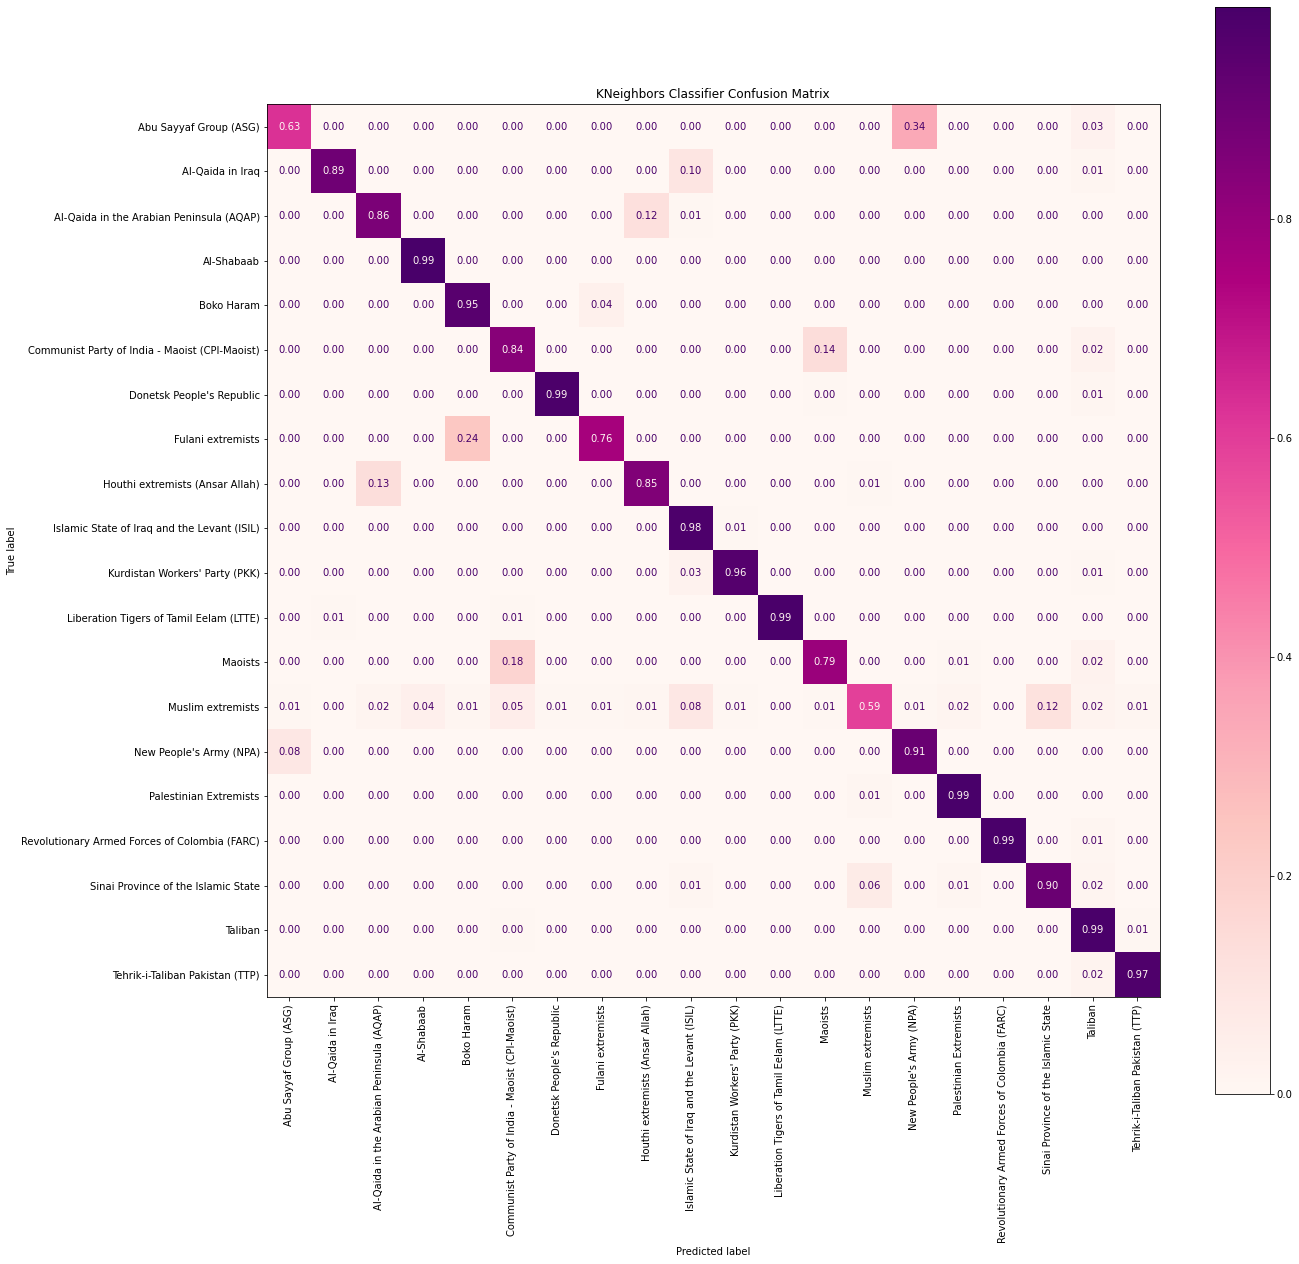

In [36]:
fig, ax = plt.subplots(figsize = (20,20))

matrix = plot_confusion_matrix(knn, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='RdPu', normalize='true', values_format='.2f')
plt.title('KNeighbors Classifier Confusion Matrix')
plt.show()

# Naive Bayes Classifier 

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
start_time=time.time()
nb=GaussianNB()
nb.fit(x_train_std, y_train)
print("Accuracy on Train set : ", nb.score(x_train_std,y_train))
print("Accuracy on Test set : ", nb.score(x_test_std,y_test))
end_time = time.time()
nb_run_time = end_time - start_time

print('Runtime of the Naive Bayes Algorithm: {:.3f}s'.format(nb_run_time))



Accuracy on Train set :  0.7000041654517433
Accuracy on Test set :  0.7046360190494703
Runtime of the Naive Bayes Algorithm: 1.671s


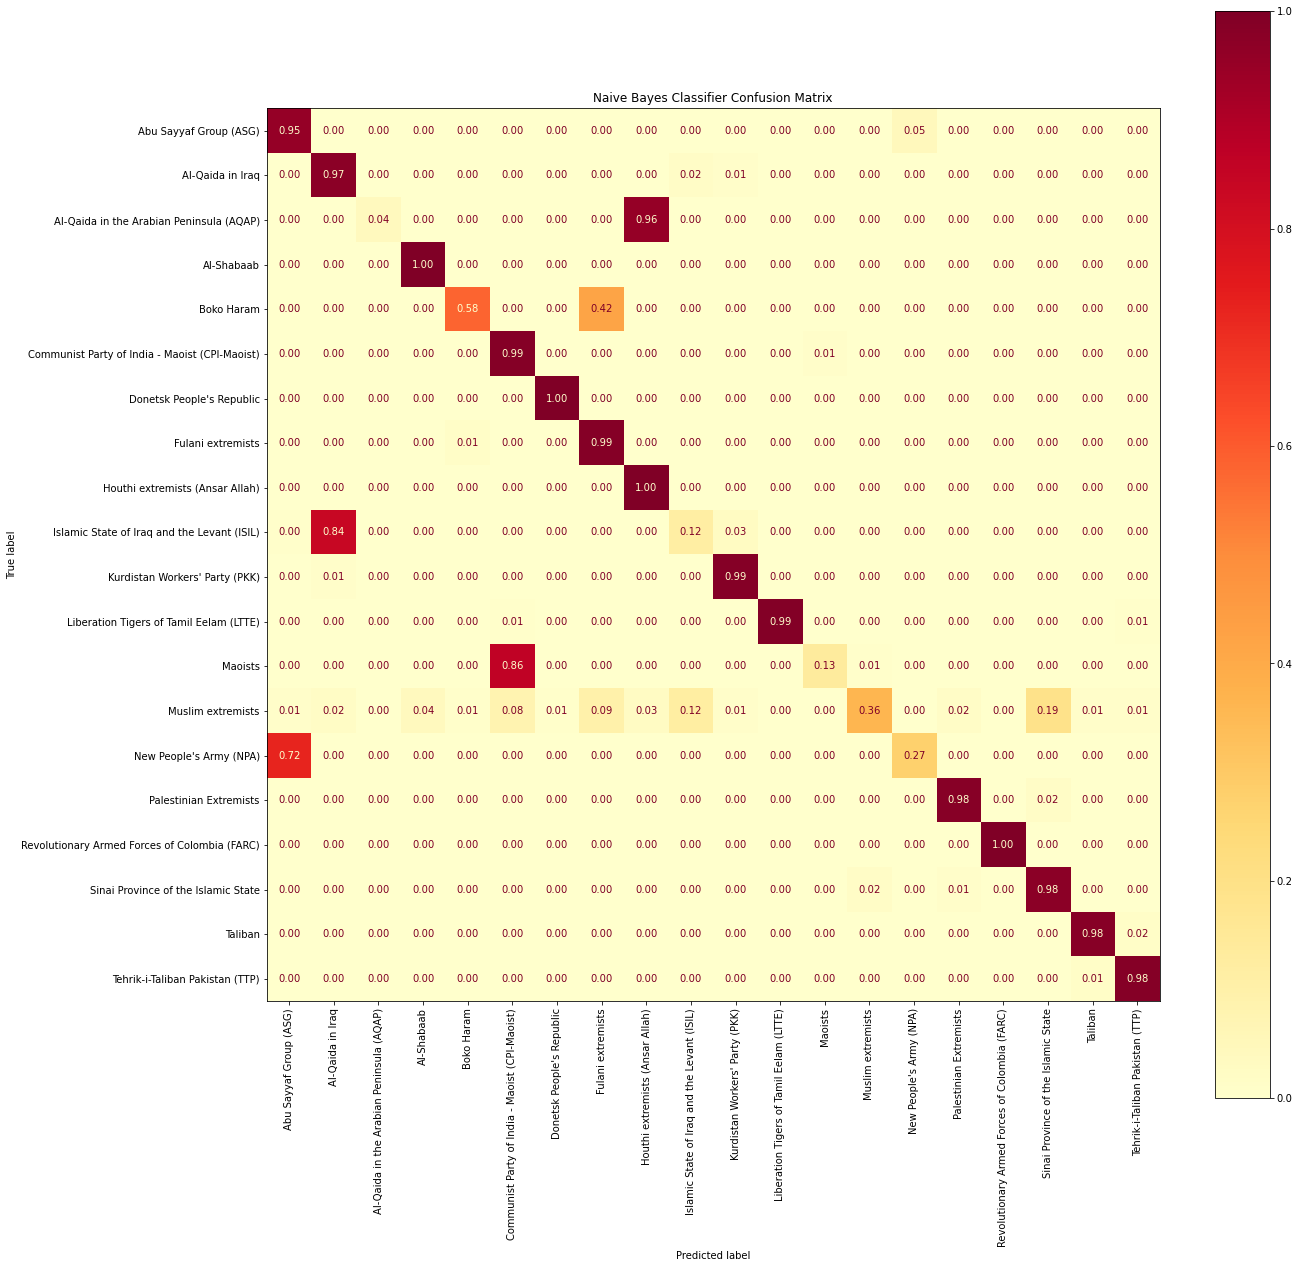

In [39]:
fig, ax = plt.subplots(figsize = (20,20))

matrix = plot_confusion_matrix(nb, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='YlOrRd', normalize='true', values_format='.2f')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.show()

# Decision Tree

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'min_samples_leaf':[1, 2, 3, 4, 5, 10, 25, 50, 100],'max_depth':np.arange(2, 10)}

grid_dt = GridSearchCV(dt,param_grid,scoring='accuracy',cv = 10,refit = True)

In [41]:
grid_dt.fit(x_train_std,y_train)
print("Best Score ==> ", grid_dt.best_score_)
print("Best Paramerers ==> ", grid_dt.best_params_)

Best Score ==>  0.9313528738025824
Best Paramerers ==>  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5}


In [42]:
start_time = time.time()

dt = DecisionTreeClassifier(**grid_dt.best_params_, random_state=42)
dt.fit(x_train_std, y_train)

print("Accuracy on Train set : ", dt.score(x_train_std,y_train))
print("Accuracy on Test set : ", dt.score(x_test_std,y_test))

end_time = time.time()
dtc_run_time = end_time - start_time

print('Runtime of the Decision Tree Classifier Algorithm: {:.3f}s'.format(dtc_run_time))

Accuracy on Train set :  0.937143333194485
Accuracy on Test set :  0.9389639420740596
Runtime of the Decision Tree Classifier Algorithm: 0.408s


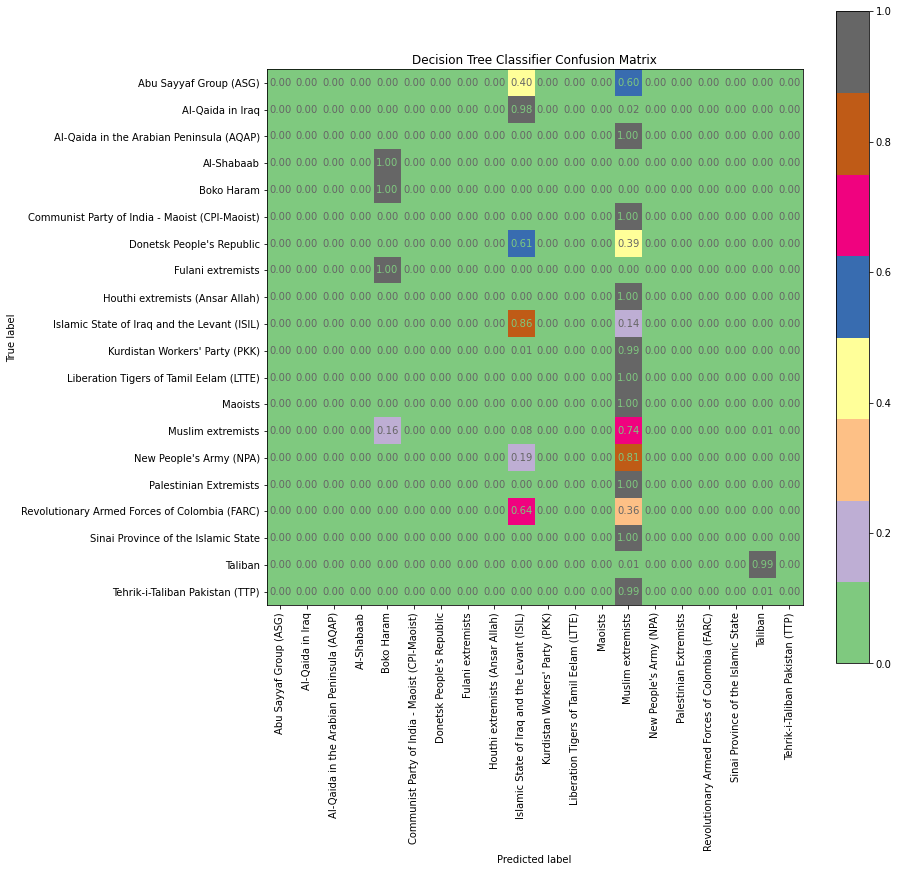

array(['Palestinian Extremists', 'Taliban', 'Taliban', ..., 'Boko Haram',
       'Tehrik-i-Taliban Pakistan (TTP)',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [43]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(dt, x_test, y_test, ax=ax, xticks_rotation='vertical', 
                               cmap='Accent', normalize='true', values_format='.2f')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

dt.predict(x_test_std)




# Random forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(random_state = 0)
n_est = {'n_estimators' : [10,100,500,1000]}
rf_grid = GridSearchCV(rf,n_est,scoring='accuracy', refit=True, cv=10)

In [47]:
start_time = time.time()

rf = RandomForestClassifier(**grid_dt.best_params_, random_state=42)
rf.fit(x_train_std, y_train)

print("Accuracy on Train set : ", rf.score(x_train_std,y_train))
print("Accuracy on Test set : ", rf.score(x_test_std,y_test))

end_time = time.time()
rf_run_time = end_time - start_time

print('Runtime of the Random Forest Classifier Algorithm: {:.3f}s'.format(rf_run_time))

Accuracy on Train set :  0.9017369933769317
Accuracy on Test set :  0.9050442219846438
Runtime of the Random Forest Classifier Algorithm: 3.200s


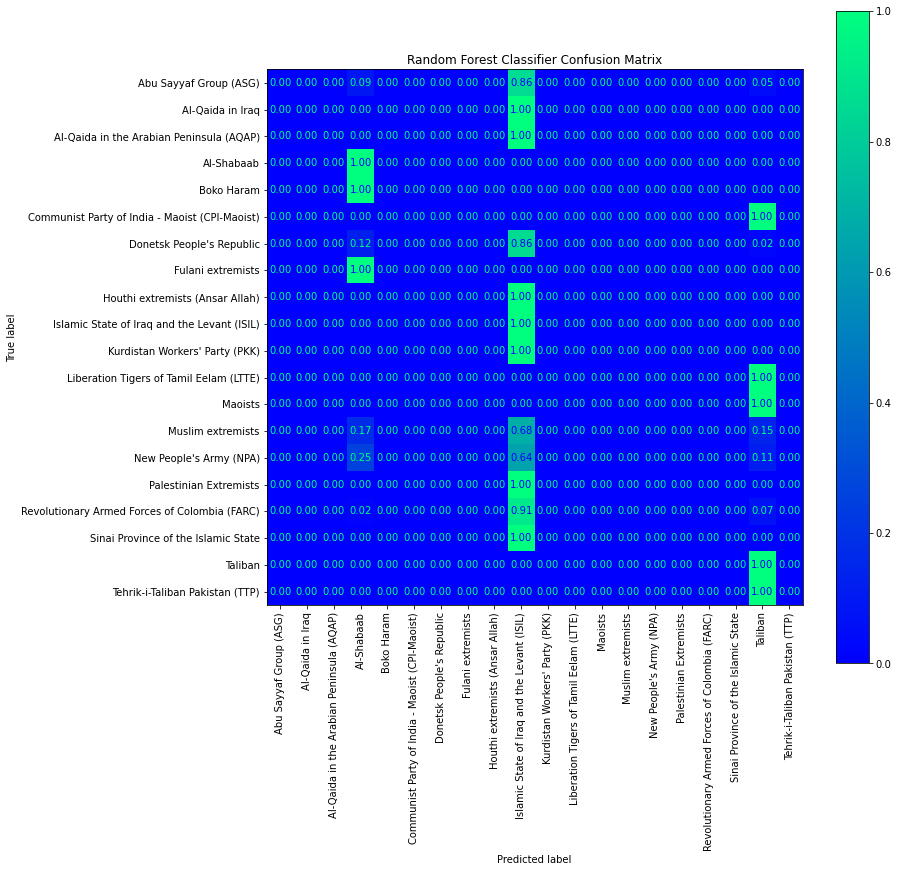

In [48]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(rf, x_test, y_test, ax=ax, xticks_rotation='vertical', 
                               cmap='winter', normalize='true', values_format='.2f')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [5]:
models=["K Nearest Neighbours","Naive Bayes", "Decision Tree", "Random Forest Classifier"]
Test_accuracy=[0.9366313538730683, 0.7046360190494703, 0.9389639420740596,  0.9050442219846438]
Train_accuracy=[1.0, 0.7000041654517433,  0.937143333194485, 0.9017369933769317 ]
Run_time=["18.060s", "1.671s","0.408s", "3.200s"]
d={"Model_Name":models, "Test_Accuracy":Test_accuracy, "Train_Accuracy":Train_accuracy, "Run_Time": Run_time}
Prediction=pd.DataFrame(data=d)

In [6]:
Prediction


,Model_Name,Test_Accuracy,Train_Accuracy,Run_Time
0,K Nearest Neighbours,0.936631,1.000000,18.060s
1,Naive Bayes,0.704636,0.700004,1.671s
2,Decision Tree,0.938964,0.937143,0.408s
3,Random Forest Classifier,0.905044,0.901737,3.200s


NameError: name 'Solution' is not defined